# Twitter Dataset EDA

The following is an exploritory analysis of possible data insights from a large dataset of twitter posts. All of which include the context, and content of the posts. This dataset poses a strong opertunity to apply linguistic analysis methods for the determination of optimal post content and conditions for boosting viewer engadgment. 

### General Investigation

We will start by opening up the data, and looking at the different features, as well as looking for any errors, or potential issues with the data.

In [1]:
import pandas as pd
df = pd.read_csv('./DMO social media engagement dataset/Data LIWC 01 02 23.csv')

In [2]:
df.head()

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,...,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
0,1,1,Assam,S1438213588544409600,0,1,1,0,3,S1438213588544409600,...,0.0,0.0,0.0,3.23,0.0,0.00,0.0,1,-2,1
1,2,2,Assam,S1438437895270846464,0,1,1,0,3,S1438437895270846464,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-1,0
2,3,3,Assam,S1439558164936941574,0,1,1,0,3,S1439558164936941574,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-2,1
3,4,4,Assam,S1439920409801945089,0,1,3,0,5,S1439920409801945089,...,0.0,0.0,0.0,0.00,0.0,2.08,0.0,1,-1,0
4,5,5,Assam,S1440221445011898371,0,1,1,0,3,S1440221445011898371,...,0.0,0.0,0.0,5.71,0.0,0.00,0.0,1,-1,0


In [7]:
print(len(df))
df.columns 

23006


Index(['Sno', 'X', 'State', 'conversation_id', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'Buzz', 'id', 'Date1', 'OpnHours',
       'DateDay', 'Day', 'Time', '3-Phase', '4-phase', 'Followers',
       'Status text', 'Vividness', 'ContentType', 'WC', 'Clout', 'Cognition',
       'Affect', 'emotion', 'emo_pos', 'emo_neg', 'we', 'tentat', 'Drives',
       'i', 'we.1', 'they', 'insight', 'cause', 'discrep', 'certitude',
       'Positive', 'Negative', 'Total_Sentiment'],
      dtype='object')

In [5]:
df['ContentType'].value_counts()

ContentType
Information    16361
Interaction     6645
Name: count, dtype: int64

In [15]:
columns_to_describe = ['word_counts', 'Time', 'like_count', 'reply_count', 'Followers', 'quote_count', 'retweet_count' ]

for column in columns_to_describe:
    print(column)
    print(df[column].describe())
    print('\n')

word_counts
count    23006.000000
mean        33.281622
std         10.196650
min          2.000000
25%         27.000000
50%         35.000000
75%         41.000000
max         58.000000
Name: word_counts, dtype: float64


Time
count                  23006
unique                     2
top       Non-buisness hours
freq                   13002
Name: Time, dtype: object


like_count
count    23006.000000
mean       139.501304
std        537.268359
min          0.000000
25%         27.000000
50%         63.000000
75%        137.000000
max      38244.000000
Name: like_count, dtype: float64


reply_count
count    23006.000000
mean         3.595062
std         32.241142
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       4580.000000
Name: reply_count, dtype: float64


Followers
count    2.300600e+04
mean     5.082265e+05
std      5.960315e+05
min      5.164000e+03
25%      9.132500e+04
50%      1.901970e+05
75%      6.507710e+05
max      1.972674

- We can see from the above printouts that the minimum number of followers for any poster within this dataset is above 5,000. This servers as an optimal grouping for our investigations as we founded the idea of this project as a tool for companies determining who to get to advertise, products etc.

- We can also see that across all of the different engadgment metrics we have very flat distributions, indicating that we do have a diverse dataset in terms of case in user engadgment showing that there is opertunity to draw meaningful insights.

In [11]:
df['Date1'] = pd.to_datetime(df['Date1'])

/tmp/ipykernel_7710/455609604.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date1'] = pd.to_datetime(df['Date1'])


In [12]:
nan_report = df.isnull().sum()
print(nan_report)

Sno                0
X                  0
State              0
conversation_id    0
retweet_count      0
reply_count        0
like_count         0
quote_count        0
Buzz               0
id                 0
Date1              0
OpnHours           0
DateDay            0
Day                0
Time               0
3-Phase            0
4-phase            0
Followers          0
Status text        0
Vividness          0
ContentType        0
WC                 0
Clout              0
Cognition          0
Affect             0
emotion            0
emo_pos            0
emo_neg            0
we                 0
tentat             0
Drives             0
i                  0
we.1               0
they               0
insight            0
cause              0
discrep            0
certitude          0
Positive           0
Negative           0
Total_Sentiment    0
dtype: int64


## Word Content Similarity Grouping

In the intrest of looking for potential relations that could be useful in later predictive systems we will group the dataframe based on similarity in text content. To do this we will pre process the text, and group them based on the TF-IDF (Term Frequency, Inverse Document Frequency) method. Using a K-means clustering system.

First we will preform an elbow method evaluation of the vectorized post cotent to determine the optimal number of clusters for describing the data

Text(0.5, 1.0, 'Elbow Method')

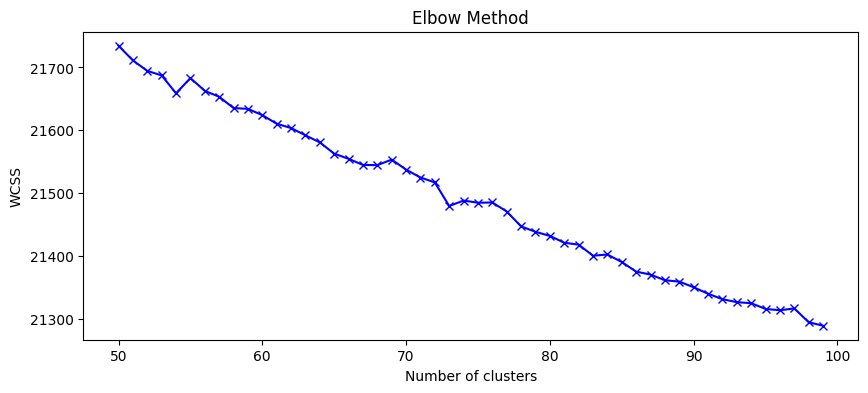

In [51]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Vectorize the tweets
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Status text'])

# Step 2: Determine optimal clusters using the Elbow Method and Silhouette Analysis
wcss = []  # Stores Within-Cluster Sum of Squares


# Range for number of clusters (adjust based on expected cluster count)
cluster_range = range(50,100)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 4))
plt.plot(cluster_range, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')





After searching we can see the eblow method does not reveal a clear number of groups within the text data. As such we will slightly adapt the method of optimization. We will combine the eblow method evaluation with a slihowette score

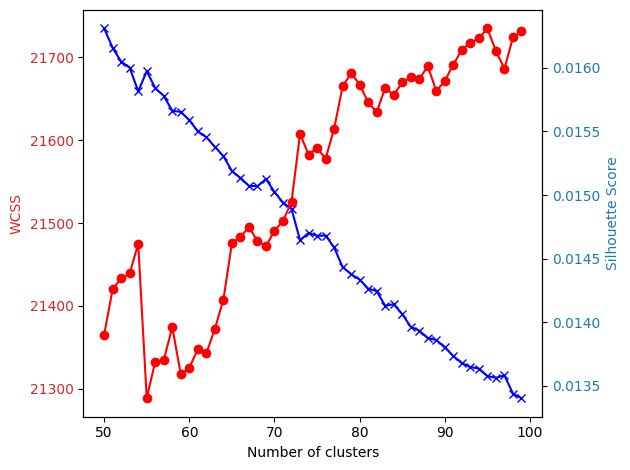

In [52]:
# calculate silhouette score
silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# plot eblow, and silhouette scores on the same axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(cluster_range, wcss, 'bx-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, silhouette_scores, 'ro-')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


In [53]:
print(f"optimal_clusters: {silhouette_scores.index(max(silhouette_scores))}")

optimal_clusters: 45


In [54]:
# now let's cluster the tweets into the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores))
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Analyze the clusters

# count in each cluster
df['cluster'] = kmeans.labels_
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)



cluster
4     4814
38    1258
30    1016
34     916
28     759
31     724
15     686
20     627
43     611
26     590
11     580
12     568
25     562
6      558
8      557
21     521
19     412
29     409
37     405
0      392
27     367
1      364
40     359
22     354
9      347
14     333
17     320
2      314
24     313
13     292
36     256
32     255
23     240
33     235
44     220
42     206
5      206
10     169
7      169
3      151
41     149
18     131
16     125
35     112
39      54
Name: count, dtype: int64


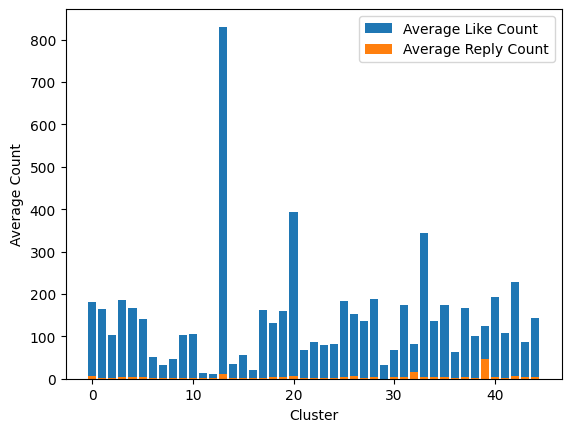

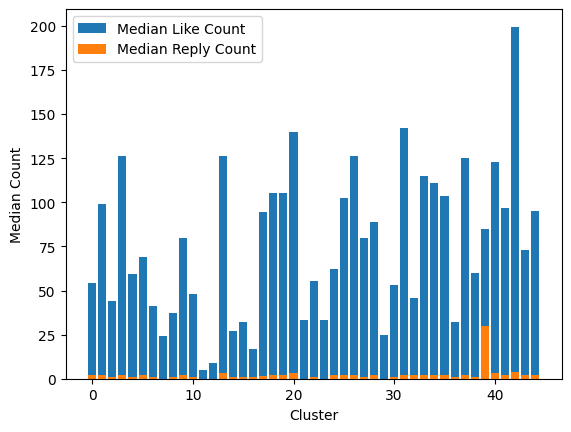

In [55]:
# get the average like_count in each cluster
cluster_avg_like = df.groupby('cluster')['like_count'].mean()


# get the average reply_count in each cluster
cluster_avg_reply = df.groupby('cluster')['reply_count'].mean()


# plot them both on a distribution
fig, ax = plt.subplots()
ax.bar(cluster_avg_like.index, cluster_avg_like, label='Average Like Count')
ax.bar(cluster_avg_reply.index, cluster_avg_reply, label='Average Reply Count')
ax.set_xlabel('Cluster')
ax.set_ylabel('Average Count')
ax.legend()
plt.show()


# create another plot showing the median like_count and reply_count in each cluster
cluster_median_like = df.groupby('cluster')['like_count'].median()
cluster_median_reply = df.groupby('cluster')['reply_count'].median()

fig, ax = plt.subplots()
ax.bar(cluster_median_like.index, cluster_median_like, label='Median Like Count')
ax.bar(cluster_median_reply.index, cluster_median_reply, label='Median Reply Count')
ax.set_xlabel('Cluster')
ax.set_ylabel('Median Count')
ax.legend()
plt.show()



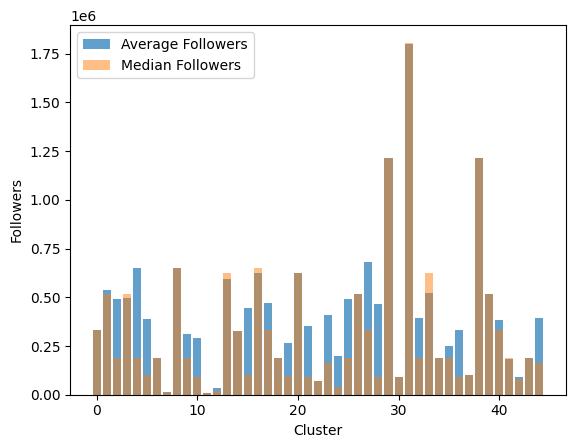

In [56]:
# now let's look at followers per cluster
cluster_avg_followers = df.groupby('cluster')['Followers'].mean()
cluster_median_followers = df.groupby('cluster')['Followers'].median()

fig, ax = plt.subplots()
ax.bar(cluster_avg_followers.index, cluster_avg_followers, label='Average Followers', alpha=0.7)
ax.bar(cluster_median_followers.index, cluster_median_followers, label='Median Followers', alpha=0.5)
ax.set_xlabel('Cluster')
ax.set_ylabel('Followers')
ax.legend()
plt.show()


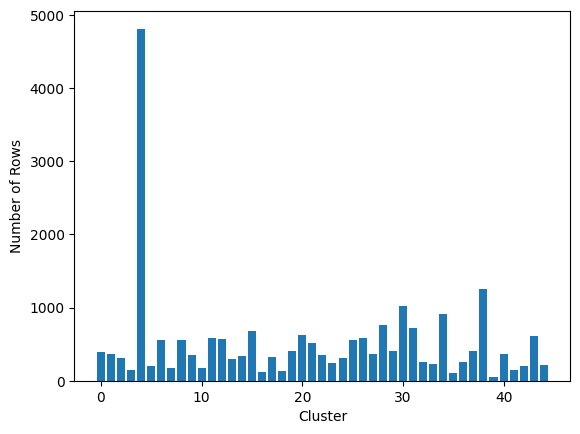

In [57]:
# let's now look at the number of rows in each cluster
cluster_counts = df['cluster'].value_counts()
fig, ax = plt.subplots()
ax.bar(cluster_counts.index, cluster_counts)
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of Rows')
plt.show()


From the above content cluster based analysis we can see that there are strong variations in key metrics across different groupings of content types. This means that there is indeed opertunity within the dataset to preform a lingustic based analysis to predict the engeagment of posts by users, and determine which content types are likely to have the largest engadgment scores.

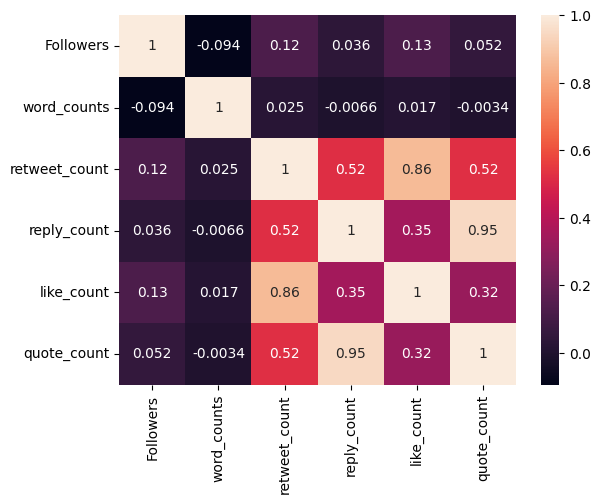

In [58]:
# crate a correlation matrix for all of the columns


columns_to_include = ['Followers', 'word_counts','retweet_count', 'reply_count',
       'like_count', 'quote_count']

# create a correlation matrix for the columns we are interested in
correlation_matrix = df[columns_to_include].corr()
#print(correlation_matrix)

# plot the correlation matrix
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

